# Instartcart Market Analysis
*By Don Kim*
##### Ryerson University
##### CKME136 July 2020
`instacart`


# Data Analysis Cycle
---

> <a href="#Reading-datasets">1. Reading datasets</a><ul></ul>
> <a href="#Initial-data-cleaning">2. Initial data cleaning</a><ul></ul>
> <a href="#Data-exploration">3. Data exploration</a><ul></ul>
> <a href="#Correlation">4. Correlation</a><ul></ul>
> <a href="#Association-rule">5. Association rule</a><ul></ul>
> <a href="#Customer-segmentation">6. Customer segmentation</a><ul></ul>
> <a href="#Reorder-Classification">7. Reorder Classification</a><ul></ul>

# Datasets links
<a href="https://storage.googleapis.com/instacart-datasets/aisles.csv">aisles.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/departments.csv">departments.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/order_products__prior.csv">order_products__prior.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/order_products__train.csv">order_products__train.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/orders.csv">orders.csv</a><ul></ul>
<a href="https://storage.googleapis.com/instacart-datasets/products.csv">products.csv</a><ul></ul>

[entire dataset from Instacart site](https://www.kaggle.com/c/instacart-market-basket-analysis/overview)


---
---

# Reading datasets
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


datasets are loaded locally.

In [2]:
%%time
aisles = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/aisles.csv')
departments = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/departments.csv')
order_products_prior = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/order_products__prior.csv')
order_products_train = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/order_products__train.csv')
orders = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/orders.csv')
products = pd.read_csv('/Users/donkim/Desktop/instacart-market-basket-analysis/products.csv')
df_list = []
df_list.append(aisles)
df_list.append(departments)
df_list.append(order_products_prior)
df_list.append(order_products_train)
df_list.append(orders)
df_list.append(products)

CPU times: user 11.7 s, sys: 2.85 s, total: 14.6 s
Wall time: 18.4 s


---
---

# Initial data cleaning
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

It shows all the datatypes and number of null values in datasets. Null values are removed instead of replacing.

In [3]:
for l in df_list:
  print(l.info())
  print(l.shape)
  print(' - NaN in dataset - ')
  print(l.isnull().sum())
  print('--------------------------------------------')

# orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
# orders['days_since_prior_order'] = orders.days_since_prior_order.astype(int)
orders.days_since_prior_order.dropna(inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
(134, 2)
 - NaN in dataset - 
aisle_id    0
aisle       0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
(21, 2)
 - NaN in dataset - 
department_id    0
department       0
dtype: int64
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):


---
---

# Data exploration
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

## Plot of order demand during week over 24 hours

It shows a plot of order count in 24 hours. Each line represents monday to sunday

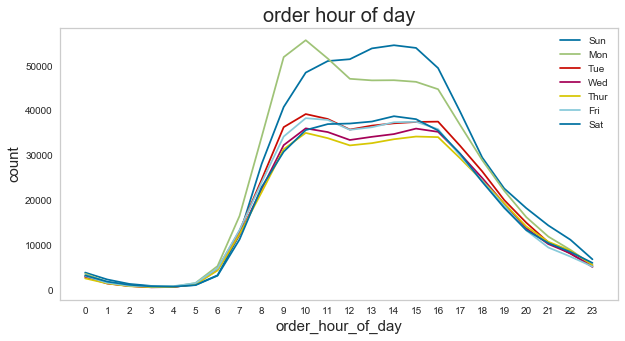

In [58]:
#
path='/content/drive/My Drive/'
plt.figure(figsize=(10,5))
for i in range(0,7):
  orders[orders['order_dow']==i].groupby('order_hour_of_day').size().plot()
plt.legend(['Sun','Mon','Tue','Wed','Thur','Fri','Sat'])
plt.title('order hour of day', fontsize= 20)
plt.xlabel('order_hour_of_day', fontsize= 15) 
plt.ylabel('count', fontsize= 15)
plt.xticks(range(0,24))
plt.grid()
#plt.savefig(path+'.png')
plt.show()

## Number of order in a week

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000.]),
 <a list of 8 Text yticklabel objects>)

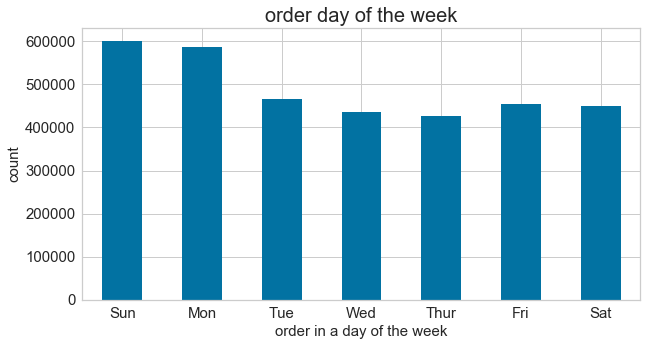

In [59]:
plt.figure(figsize=(10,5))
orders.groupby('order_dow').size().plot(kind="bar")
plt.title('order day of the week',fontsize=20)
plt.xlabel('order in a day of the week',fontsize=15) 
plt.ylabel('count',fontsize=15)
plt.xticks([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],rotation=0,fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig(path+'.png')

## Days since order has placed

Plot shows how long the delay is when customer do next order. Pick order day is after 7 days. Anything over 30 days is in 30 days bar.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

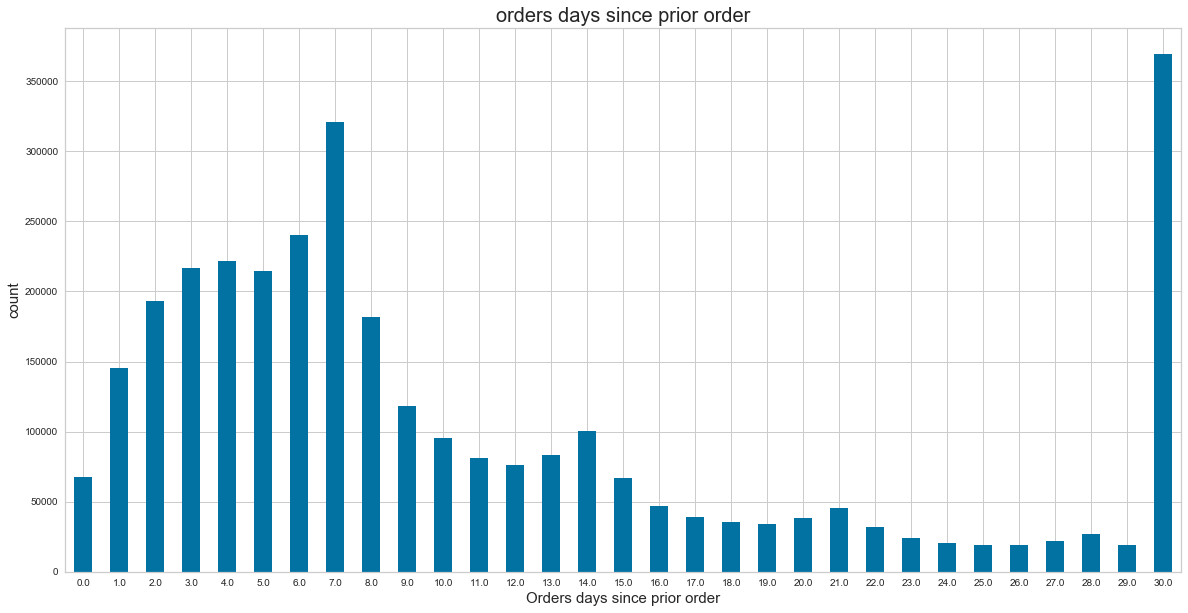

In [60]:
plt.figure(figsize=(20,10))
orders.groupby('days_since_prior_order').size().plot(kind="bar")
plt.title('orders days since prior order', fontsize=20)
plt.xlabel('Orders days since prior order', fontsize=15)
plt.ylabel('count',fontsize =15)
plt.xticks(rotation=0)



## Finding top 10 selling products

### - Merge dataset 
Merge dataset in order to find product name.

In [61]:
new_train = pd.merge(order_products_train, products, on='product_id')
new_train.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,816049,49302,7,1,Bulgarian Yogurt,120,16
2,1242203,49302,1,1,Bulgarian Yogurt,120,16
3,1383349,49302,11,1,Bulgarian Yogurt,120,16
4,1787378,49302,8,0,Bulgarian Yogurt,120,16


### - Plot of 10 selling products

TypeError: 'Text' object is not callable

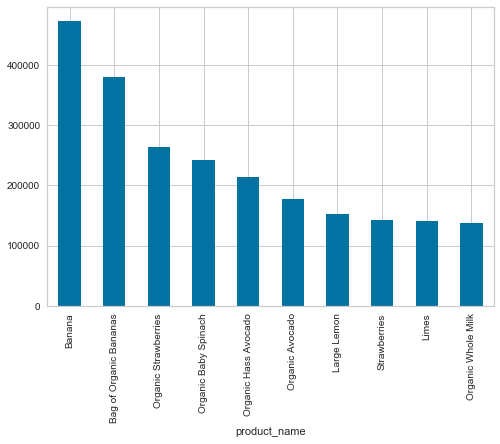

In [62]:
#df = pd.DataFrame({'Product_ID':order_products_train.product_id.unique()})
#df.groupby('Product_ID').count()
#df
#order_products_train.product_id.value_counts()
#c = products[products.product_id.isin(df.index)].product_name
# merge https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
new_train = pd.merge(order_products_prior, products, on='product_id')
df = new_train.groupby('product_name').size().to_frame('size')
df2 = df.sort_values(by='size', ascending=False).head(10)
p = df2.plot.bar()
p.legend().remove()
p.title('Top 10 selling products')

## Plot of reorder ratio
58% products are reordered

1    0.589697
0    0.410303
Name: reordered, dtype: float64


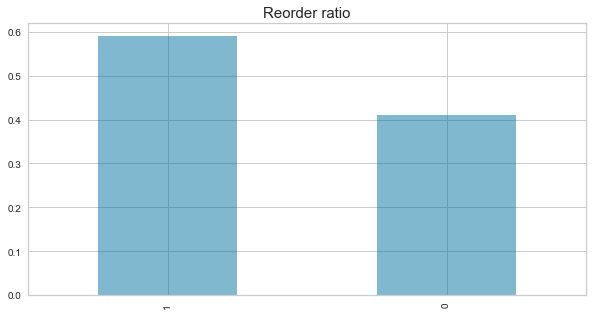

In [63]:
plt.figure(figsize=(10,5))
order_products_train.head()
#df.plot.bar( y='size', rot =0)
order_products_prior.reordered.value_counts(normalize=True).plot(kind="bar",alpha =0.5)
plt.title('Reorder ratio',fontsize=15)
print(order_products_prior.reordered.value_counts(normalize=True))

## Distribution of number of order items

Maximum number of order items is 145. Median size of order is 8.


          size
order_id      
2            9
3            8
4           13
5           26
6            3
               size
count  3.214874e+06
mean   1.008888e+01
std    7.525398e+00
min    1.000000e+00
25%    5.000000e+00
50%    8.000000e+00
75%    1.400000e+01
max    1.450000e+02
median  size    8.0
dtype: float64
max size    145
dtype: int64


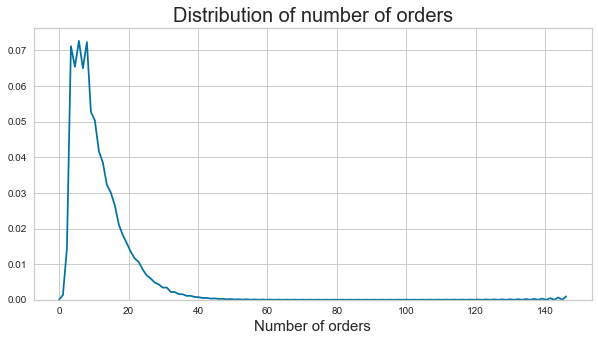

In [64]:

df = order_products_prior.groupby('order_id').size().to_frame('size')
#df2 = df.sort_values(by='size', ascending=False).head(30)
#df2.plot.bar()
#print(df2)
#order_products_train.order_id.value_counts().plot(kind="bar",alpha =0.5)
#order_products_train.order_id.value_counts(
plt.figure(figsize=(10,5))
print(df.head())
sns.distplot(df,hist=False)
plt.title('Distribution of number of orders', fontsize =20)
plt.xlabel('Number of orders', fontsize =15)
print(df.describe())
print('median ',df.median())
print('max', df.max())


## Number of orders for customers

Customers orders at least 3 times.

Text(0.5, 0, 'Order numbers')

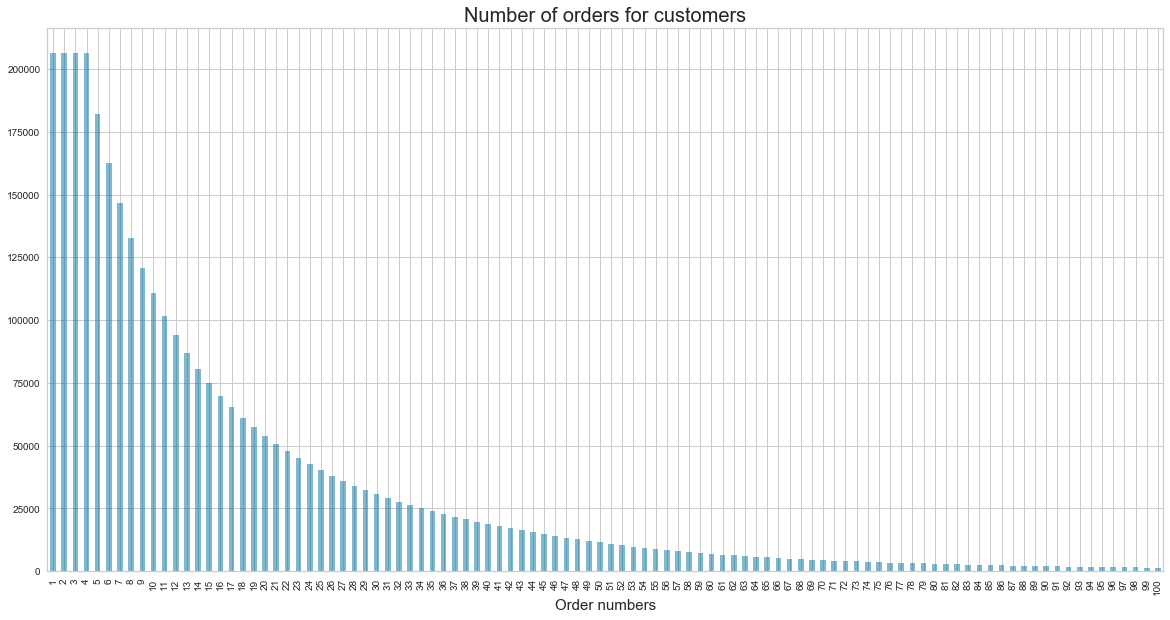

In [65]:
plt.figure(figsize=(20,10))
orders.order_number.value_counts(normalize=False).plot(kind="bar",alpha =0.5)

plt.title('Number of orders for customers',fontsize=20)
plt.xlabel('Order numbers',fontsize=15)
# It shows that cusotmer orders at least 3 times and more.


## Pie chart of product distribution

Produce, daily eggs, snack and beverage are over 50% of product sold.



([<matplotlib.patches.Wedge at 0x1b73d18690>,
 [Text(0.6680107956168984, 0.8739345381315918, 'produce'),
  Text(-0.7813301447473172, 0.7742888381664407, 'dairy eggs'),
  Text(-1.0997036040614931, -0.025533961975437093, 'snacks'),
  Text(-0.929949414726075, -0.5875322000117363, 'beverages'),
  Text(-0.5562240525522754, -0.949007272555023, 'frozen'),
  Text(-0.14462287136854038, -1.0904513859302114, 'pantry'),
  Text(0.17936859203453256, -1.0852773416005466, 'bakery'),
  Text(0.40926728358851094, -1.021029035132734, 'canned goods'),
  Text(0.6087978507482359, -0.916168749152867, 'deli'),
  Text(0.7675383742555044, -0.7879624636016728, 'dry goods pasta'),
  Text(0.8803045342869532, -0.659593759001577, 'household'),
  Text(0.9638794655266397, -0.5300343158099101, 'breakfast'),
  Text(1.0273913179752587, -0.3930230015521494, 'meat seafood'),
  Text(1.0648739543951256, -0.27575978903909826, 'personal care'),
  Text(1.0843221007029922, -0.18505561846928756, 'babies'),
  Text(1.094293152963774

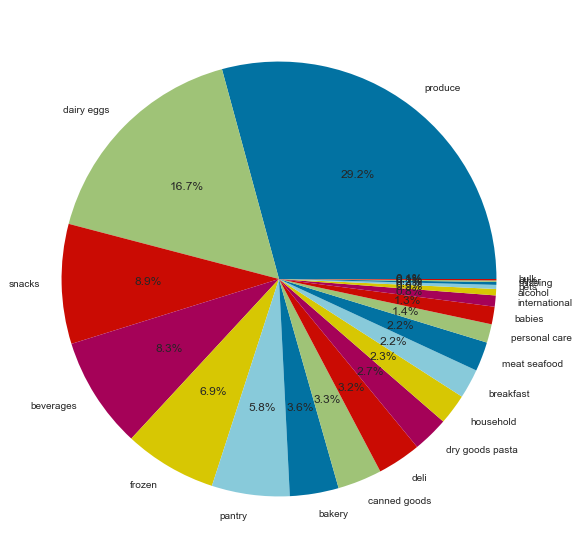

In [52]:
p_df=pd.merge(products,departments,on='department_id')
p_df=pd.merge(p_df,aisles, on ='aisle_id')
o_df=pd.merge(p_df,order_products_prior,on = 'product_id')
plt.figure(figsize=(20,10))
result = o_df['department'].value_counts(normalize=True)
plt.pie(result,labels=result.index, autopct='%1.1f%%')

---
---

# Correlation
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

### Correlation of orders

In [51]:
orders.head()
order_products = order_products_prior.append(order_products_train)
order_size = order_products.groupby('order_id').size().to_frame('order_size')
new_orders = pd.merge(orders, order_size, on='order_id')
new_orders.head()
new_orders.drop(columns=['order_id','user_id'],inplace=True)
# import numpy as np
# f, ax = plt.subplots(figsize=(10, 8))
corr = new_orders.corr()
# #sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
# #            square=True, ax=ax)
corr.style.background_gradient(cmap='coolwarm')



,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_size
order_number,1.000000,0.015157,-0.035910,-0.360495,-0.002118
order_dow,0.015157,1.000000,0.006082,-0.028409,-0.025404
order_hour_of_day,-0.035910,0.006082,1.000000,0.000863,-0.005596
days_since_prior_order,-0.360495,-0.028409,0.000863,1.000000,0.057544
order_size,-0.002118,-0.025404,-0.005596,0.057544,1.000000


In [54]:
#import numpy as np
#f, ax = plt.subplots(figsize=(10, 8))
#corr = o_df.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#             square=True, ax=ax)
#corr.style.background_gradient(cmap='coolwarm')

---
---

# Association rule
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>


This machine learning is to find products relations. Using association rule, we can find relationshop of products customers are buying. For example, if customer buys product A, what chances that product B will be bought by same customer. 


In [4]:
#!pip install apyori


## Restructure the dataset

For each order ID, there are bags of product IDs. This dataset will be used in association rule.

In [5]:
%%time
# 6mins
prior = order_products_prior.groupby(['order_id'])['product_id'].apply(list)
prior.head()


CPU times: user 6min 39s, sys: 10.1 s, total: 6min 49s
Wall time: 7min 2s


order_id
2    [33120, 28985, 9327, 45918, 30035, 17794, 4014...
3    [33754, 24838, 17704, 21903, 17668, 46667, 174...
4    [46842, 26434, 39758, 27761, 10054, 21351, 225...
5    [13176, 15005, 47329, 27966, 23909, 48370, 132...
6                                [40462, 15873, 41897]
Name: product_id, dtype: object

## Apriori association

this is a first senario

* Minimum length is 2
* Minimum support is 0.01
* Minimum confidence is 0.1
* Minimum lift is 2

Total 7 items are returned

In [29]:
%%time
from apyori import apriori
associations = apriori(prior, min_length = 2, min_support = 0.01, min_confidence = 0.1, min_lift = 2)
associations = list(associations)
print(len(associations))

7
CPU times: user 44.8 s, sys: 5.02 s, total: 49.8 s
Wall time: 56.6 s


In [30]:
%%time
def product_name(id):
    return products[products['product_id']==id]['product_name'].values[0]

df = pd.DataFrame(columns=['A','B','support','confidence','lift'])
for item in associations:    
    pair = item[0] 
    items = [x for x in pair]
#     print("length" + str(len(items)))
#     print("Rule: " + str(product_name(items[0]) + " -> " + str(product_name(items[1]))))
#     print("support " + str(item[1]))
#     print("confidence: " + str(item[2][0][2]))
#     print("lift: " + str(item[2][0][3]))
#     print('')
    row = {'A':product_name(items[0]),
           'B':product_name(items[1]),
           'support':item[1],
           'confidence':item[2][0][2],
           'lift':item[2][0][3]}
    df = df.append(row,ignore_index=True)
df

CPU times: user 93.4 ms, sys: 9.35 ms, total: 103 ms
Wall time: 155 ms


,A,B,support,confidence,lift
0,Bag of Organic Bananas,Organic Raspberries,0.012599,0.106741,2.503775
1,Bag of Organic Bananas,Organic Hass Avocado,0.019391,0.164293,2.472945
2,Organic Strawberries,Organic Raspberries,0.010533,0.127938,3.000973
3,Organic Strawberries,Organic Hass Avocado,0.012689,0.154124,2.319880
4,Organic Hass Avocado,Organic Baby Spinach,0.010856,0.144266,2.171499
5,Banana,Organic Fuji Apple,0.010558,0.378693,2.576259
6,Banana,Organic Avocado,0.016609,0.112990,2.054395


this is a second senario

* Minimum length is 2
* Minimum support is 0.005
* Minimum confidence is 0.05
* Minimum lift is 3

In [24]:
%%time
# 57seconds

associations = apriori(prior, min_length = 2, min_support = 0.005, min_confidence = 0.05, min_lift = 3)
associations = list(associations)


CPU times: user 1min 8s, sys: 7 s, total: 1min 15s
Wall time: 1min 24s


The length of association rule is 6

In [25]:
print(len(associations))

6


## Interpretation of association result

Banana has strong relation to other fruites: raspberries, avocado

In [26]:
%%time
def product_name(id):
    return products[products['product_id']==id]['product_name'].values[0]

df = pd.DataFrame(columns=['A','B','support','confidence','lift'])
for item in associations:    
    pair = item[0] 
    items = [x for x in pair]
#     print("length" + str(len(items)))
#     print("Rule: " + str(product_name(items[0]) + " -> " + str(product_name(items[1]))))
#     print("support " + str(item[1]))
#     print("confidence: " + str(item[2][0][2]))
#     print("lift: " + str(item[2][0][3]))
#     print('')
    row = {'A':product_name(items[0]),
           'B':product_name(items[1]),
           'support':item[1],
           'confidence':item[2][0][2],
           'lift':item[2][0][3]}
    df = df.append(row,ignore_index=True)
df
    



CPU times: user 83.6 ms, sys: 43.2 ms, total: 127 ms
Wall time: 293 ms


,A,B,support,confidence,lift
0,Organic Hass Avocado,Organic Lemon,0.006609,0.242131,3.644560
1,Organic Strawberries,Organic Raspberries,0.010533,0.127938,3.000973
2,Organic Garlic,Organic Yellow Onion,0.006866,0.194603,5.698983
3,Limes,Organic Cilantro,0.005464,0.124905,5.775753
4,Limes,Large Lemon,0.008524,0.194863,4.103710
5,Organic Hass Avocado,Organic Cucumber,0.005430,0.217136,3.268339


3rd senario setup

* Minimum length is 2
* Minimum support is 0.001
* Minimum confidence is 0.01
* Minimum lift is 45

12 rules

In [27]:
%%time
associations = apriori(prior, min_length = 2, min_support = 0.001, min_confidence = 0.01, min_lift = 45)
associations = list(associations)
print(len(associations))

12


In [28]:
df = pd.DataFrame(columns=['A','B','support','confidence','lift'])
for item in associations:    
    pair = item[0] 
    items = [x for x in pair]
#     print("length" + str(len(items)))
#     print("Rule: " + str(product_name(items[0]) + " -> " + str(product_name(items[1]))))
#     print("support " + str(item[1]))
#     print("confidence: " + str(item[2][0][2]))
#     print("lift: " + str(item[2][0][3]))
#     print('')
    row = {'A':product_name(items[0]),
           'B':product_name(items[1]),
           'support':item[1],
           'confidence':item[2][0][2],
           'lift':item[2][0][3]}
    df = df.append(row,ignore_index=True)
df

,A,B,support,confidence,lift
0,Total 2% with Strawberry Lowfat Greek Strained...,Total 2% Lowfat Greek Strained Yogurt With Blu...,0.002902,0.449513,48.343394
1,Total 2% Lowfat Greek Strained Yogurt with Peach,Total 2% Lowfat Greek Strained Yogurt With Blu...,0.001954,0.302630,48.870721
2,Total 2% Greek Strained Yogurt with Cherry 5.3 oz,Total 2% Lowfat Greek Strained Yogurt With Blu...,0.001646,0.254938,45.421918
3,Nonfat Icelandic Style Strawberry Yogurt,Vanilla Skyr Nonfat Yogurt,0.001212,0.365563,64.780041
4,Icelandic Style Skyr Blueberry Non-fat Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.001418,0.427553,71.378186
5,Non Fat Raspberry Yogurt,Nonfat Icelandic Style Strawberry Yogurt,0.001189,0.358342,70.344028
6,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Acai & Mixed Berries Yogurt,0.001221,0.453129,75.647888
7,Icelandic Style Skyr Blueberry Non-fat Yogurt,Vanilla Skyr Nonfat Yogurt,0.002069,0.366718,61.222024
8,Non Fat Raspberry Yogurt,Vanilla Skyr Nonfat Yogurt,0.001585,0.280950,55.151722
9,Icelandic Style Skyr Blueberry Non-fat Yogurt,Non Fat Raspberry Yogurt,0.002247,0.375136,73.640837


---
---

# Customer segmentation
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>


Customer segmentation is processed using K mean clustering. Features that are used in here are 
* Total number of orders
* Average of days since order
* Average size of orders per customer
* Total reordered



In [ ]:
#!pip install yellowbrick

In [31]:
# columns user_id, total number of orders, average of days_since_prior_order, avarage size of orders per customer

c = order_products_prior.groupby('order_id')['product_id'].count()
r = order_products_prior.groupby('order_id')['reordered'].sum()
df = pd.concat([c, r], axis=1)
df = df.reset_index()
cust_orders = pd.merge(orders, df, on='order_id')
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
0,2539329,1,prior,1,2,8,NaN,5,0
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5


## Cleaning of customer dataset

In [32]:
# cust_orders.days_since_prior_order.dropna(axis=0, how='any',inplace=True)
cust_orders.dropna(inplace=True)
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5
5,3367565,1,prior,6,2,7,19.0,4,4


In [33]:
cust_orders = cust_orders[cust_orders.eval_set != 'train']
cust_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered
1,2398795,1,prior,2,3,7,15.0,6,3
2,473747,1,prior,3,3,12,21.0,5,3
3,2254736,1,prior,4,4,7,29.0,5,5
4,431534,1,prior,5,4,15,28.0,8,5
5,3367565,1,prior,6,2,7,19.0,4,4


## Construct the dataset
Constructing 4 columns of dataset

In [49]:
# total number of orders
c = cust_orders.groupby('user_id')['product_id'].count() 
# average of days since the order
d = cust_orders.groupby('user_id')['days_since_prior_order'].mean() 
# avarage size of orders per customer
a = cust_orders.groupby('user_id')['product_id'].mean()
# total reordered items per customer
r = cust_orders.groupby('user_id')['reordered'].mean()

df = pd.concat([c,d,a,r],axis=1)
df = df.reset_index()
# new_c = pd.merge(c, d, on='user_id', copy=True)
# new_c = pd.merge(new_c, a, on='user_id', copy=True)
# new_c = pd.merge(new_c, r, on='user_id', copy=True)
df.columns = ['user_id','total_orders','average_days_since_order'
                 ,'average_size_of_orders','total_reordered']
# drop user-id column
df.drop(['user_id'], axis=1, inplace = True)
df.head()

,total_orders,average_days_since_order,average_size_of_orders,total_reordered
0,9,19.555556,6.000000,4.555556
1,13,15.230769,14.000000,7.153846
2,11,12.090909,7.090909,5.000000
3,4,13.750000,3.500000,0.250000
4,3,13.333333,8.666667,4.666667


## Elbow method
Using elbow method, finding the cluster size.
In this case, the cluster size would be 5.

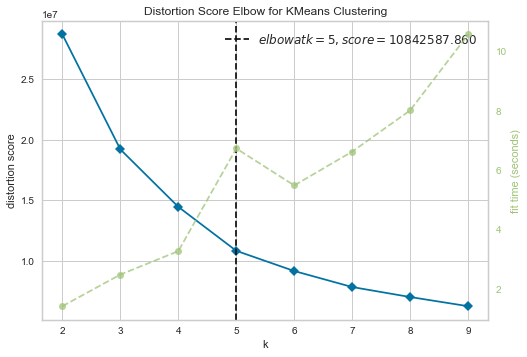

CPU times: user 49 s, sys: 5.92 s, total: 54.9 s
Wall time: 45.5 s


/Users/donkim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a4a289290>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [107]:
%%time
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

kelbow_visualizer(KMeans(random_state=4), df, k=(2,10))

5 clusters with characteristics. 

In [93]:
import sklearn
from sklearn.cluster import KMeans
import pandas

# df = scaler.transform(df)
clustering = KMeans(n_clusters=3, random_state = 2)
model = clustering.fit(df)
df_new = df.assign(Cluster = model.labels_)

print(model.cluster_centers_)
# df
result = df_new.groupby('Cluster').mean()
result.head()

[[ 6.8132906   9.73867438  4.18694118]
 [28.02595144 10.68671785  7.0442076 ]
 [66.91748081 10.02816074  7.61545994]]


,total_orders,average_size_of_orders,total_reordered
Cluster,,,
0,6.826525,9.737843,4.188232
1,28.072046,10.693811,7.052154
2,66.917481,10.028161,7.615460


In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
result_scaled = sc.fit_transform(result)
result_scaled


array([[-1.08970396, -1.03812155, -1.39750702],
       [-0.23579452,  1.35076249,  0.51105537],
       [ 1.32549848, -0.31264094,  0.88645166]])

In [98]:
result_scaled = pd.DataFrame(data=result_scaled, index = ['cluster1',
                                          'cluster2',
                                          'cluster3',
                                          'cluster4',
                                          'cluster5'],        
                                          columns=['total_orders', 
                                       'average_days_since_order',
                                       'average_size_of_order',
                                       'totla_reordered'])

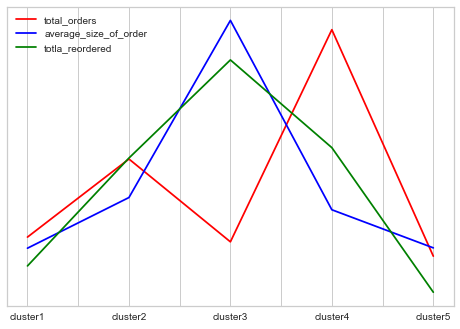

In [39]:
ax = plt.gca()
result_scaled.plot(y = 'total_orders',color='red',ax=ax)
# result_scaled.plot(y = 'average_days_since_order',color='purple',ax=ax)
result_scaled.plot(y = 'average_size_of_order',color='blue',ax=ax)
result_scaled.plot(y = 'totla_reordered',color='green',ax=ax)
ax.get_yaxis().set_visible(False)

---
---

# Reordered item analysis

reference
https://rstudio-pubs-static.s3.amazonaws.com/446413_6ac206ffa826466bb3a33be2f338c61f.html

Agrregated features are used to make a better model

## 1) Reorder vs total order number

In [8]:

## Reorder vs total order number
a = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
r = order_products_prior.groupby('order_id')['reordered'].sum()
total_order = pd.concat([a,r],axis=1)
total_order = total_order.reset_index()

total_order.columns = ['order_id','total_order','total_reordered']
total_order.head()

total_order['total_reordered_ratio']= total_order['total_reordered']/total_order['total_order']
total_order.head()



,order_id,total_order,total_reordered,total_reordered_ratio
0,2,9,6,0.666667
1,3,8,8,1.000000
2,4,13,12,0.923077
3,5,26,21,0.807692
4,6,3,0,0.000000


## 2) Reorder vs Product ID

In [9]:
##Reorder vs Dat since prior order

reordered_rate = order_products_prior.groupby('product_id', sort=False)['reordered'].mean()
# .sort_values(ascending=False)


reordered_rate = reordered_rate.reset_index()
reordered_rate.columns = ['product_id','reordered_rate']
reordered_rate.head()

,product_id,reordered_rate
0,33120,0.708454
1,28985,0.694465
2,9327,0.157962
3,45918,0.272849
4,30035,0.507909


## 3) Reorder vs order_hour_of_day

In [6]:
order_hour_of_day_rate = pd.merge(orders,order_products_prior, on='order_id')
order_hour_of_day_rate = order_hour_of_day_rate.groupby('order_hour_of_day')['reordered'].mean()

order_hour_of_day_rate = order_hour_of_day_rate.reset_index()
order_hour_of_day_rate.columns = ['order_hour_of_day','order_hour_of_day_rate']
order_hour_of_day_rate.head()

,order_hour_of_day,order_hour_of_day_rate
0,0,0.565500
1,1,0.557114
2,2,0.554455
3,3,0.559498
4,4,0.571195


## 4) Reorder vs order_dow

In [7]:
order_dow_rate = pd.merge(orders,order_products_prior, on='order_id')
order_dow_rate = order_dow_rate.groupby('order_dow')['reordered'].mean()

order_dow_rate = order_dow_rate.reset_index()
order_dow_rate.columns = ['order_dow','order_dow_rate']
order_dow_rate

,order_dow,order_dow_rate
0,0,0.585276
1,1,0.603843
2,2,0.589771
3,3,0.586272
4,4,0.590979
5,5,0.595470
6,6,0.574369


# Reorder Classification
<a href="#Instartcart-Market-Analysis">Back to top</a><ul></ul>

3 machine learning model are used:

* decision tree
* logistic
* Naive Bayes

## Combine all the dataset
Independent variable is reordered column

In [57]:
new_order_prior = []

In [10]:
%%time
# 3 mins
# new_order_prior=pd.merge(products,order_products_prior,  on='product_id')
# new_order_prior=pd.merge(aisles,new_order_prior,  on='aisle_id')
new_order_prior=pd.merge(orders,order_products_prior,  on='order_id')
new_order_prior=pd.merge(total_order,new_order_prior,  on='order_id')
new_order_prior=pd.merge(reordered_rate,new_order_prior,  on='product_id')
new_order_prior.head()

CPU times: user 1min 36s, sys: 1min 43s, total: 3min 20s
Wall time: 4min 58s


,product_id,reordered_rate,order_id,total_order,total_reordered,total_reordered_ratio,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,33120,0.708454,2,9,6,0.666667,202279,prior,3,5,9,8.0,1,1
1,33120,0.708454,26,8,2,0.250000,153404,prior,2,0,16,7.0,5,0
2,33120,0.708454,120,16,0,0.000000,23750,prior,11,6,8,10.0,13,0
3,33120,0.708454,327,8,6,0.750000,58707,prior,21,6,9,8.0,5,1
4,33120,0.708454,390,34,31,0.911765,166654,prior,48,0,12,9.0,28,1


In [17]:
new_order_prior.dtypes

product_id                  int64
reordered_rate            float64
order_id                    int64
total_order                 int64
total_reordered             int64
total_reordered_ratio     float64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
add_to_cart_order           int64
reordered                   int64
dtype: object

## Data cleaning of order dataset

In [11]:
%%time
new_order_prior.dropna(inplace=True)
new_order_prior = new_order_prior[new_order_prior.eval_set != 'train']
new_order_prior.head()

CPU times: user 15.9 s, sys: 34 s, total: 49.9 s
Wall time: 1min 18s


,product_id,reordered_rate,order_id,total_order,total_reordered,total_reordered_ratio,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
0,33120,0.708454,2,9,6,0.666667,202279,prior,3,5,9,8.0,1,1
1,33120,0.708454,26,8,2,0.250000,153404,prior,2,0,16,7.0,5,0
2,33120,0.708454,120,16,0,0.000000,23750,prior,11,6,8,10.0,13,0
3,33120,0.708454,327,8,6,0.750000,58707,prior,21,6,9,8.0,5,1
4,33120,0.708454,390,34,31,0.911765,166654,prior,48,0,12,9.0,28,1


# Feature selection

Removed all the categorical columns since sklearn cannot handle strings. Order_id is removed because it is not relevant.

In [12]:
# unrelevant features
new_order_prior.drop(['product_id',
                      'order_id',
                      'user_id',
                      'eval_set'], axis=1, inplace = True)

In [13]:
# features that are lower than 0.02
new_order_prior.drop(['total_order',
                      'order_dow',
                      'order_hour_of_day'], axis=1, inplace = True)
new_order_prior.head()

,reordered_rate,total_reordered,total_reordered_ratio,order_number,days_since_prior_order,add_to_cart_order,reordered
0,0.708454,6,0.666667,3,8.0,1,1
1,0.708454,2,0.250000,2,7.0,5,0
2,0.708454,0,0.000000,11,10.0,13,0
3,0.708454,6,0.750000,21,8.0,5,1
4,0.708454,31,0.911765,48,9.0,28,1


In [57]:
%%time
corr = new_order_prior.corr()
corr.style.background_gradient(cmap='coolwarm')

CPU times: user 4.57 s, sys: 2.67 s, total: 7.23 s
Wall time: 8.13 s


,reordered_rate,total_reordered,total_reordered_ratio,order_number,days_since_prior_order,add_to_cart_order,reordered
reordered_rate,1.000000,0.062083,0.200248,0.059858,-0.036800,-0.143393,0.325475
total_reordered,0.062083,1.000000,0.510675,0.238205,-0.072660,0.534086,0.295873
total_reordered_ratio,0.200248,0.510675,1.000000,0.433179,-0.229236,0.006018,0.579376
order_number,0.059858,0.238205,0.433179,1.000000,-0.358422,-0.004921,0.250973
days_since_prior_order,-0.036800,-0.072660,-0.229236,-0.358422,1.000000,0.053951,-0.132814
add_to_cart_order,-0.143393,0.534086,0.006018,-0.004921,0.053951,1.000000,-0.145232
reordered,0.325475,0.295873,0.579376,0.250973,-0.132814,-0.145232,1.000000


In [14]:
X = new_order_prior.iloc[:, :-1].values
y = new_order_prior.iloc[:, -1].values

In [15]:
%%time
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

CPU times: user 16.4 s, sys: 4.19 s, total: 20.5 s
Wall time: 23.7 s


## Feature scaling

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [1,3,4,5]] = sc.fit_transform(X_train[:, [1,3,4,5]])
X_test[:, [1,3,4,5]] = sc.transform(X_test[:, [1,3,4,5]])

## Train

## Decision tree prediction


In [16]:
%%time
## takes more than 8 mins
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(X_train, y_train)

#predict
y_pred = classifier.predict(X_test)

CPU times: user 13min 24s, sys: 41.3 s, total: 14min 5s
Wall time: 15min 47s


## Decision tree confusing matrix and accuracy

Accuracy is 74% which is below 80%.


Accuracy: 0.742775
Precision: 0.743273
Recall: 0.742775
fscore: 0.743015
CPU times: user 12.4 s, sys: 1.05 s, total: 13.5 s
Wall time: 14.2 s


Text(0.5, 1, 'Decision Tree Confusion Matrix')

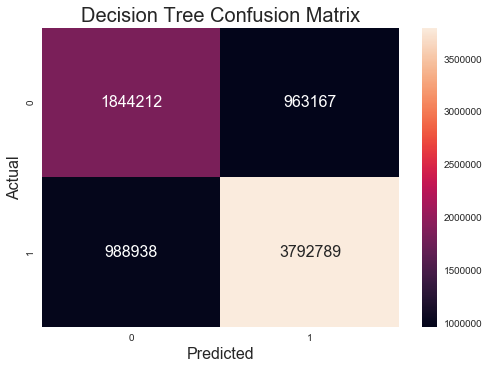

In [67]:
%%time
# making the confusion matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred)
#print(cm)
print('Accuracy: %.6f' % accuracy_score(y_test, y_pred))
output = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision: %.6f' % output[0])
print('Recall: %.6f' % output[1])
print('fscore: %.6f' % output[2])

sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Decision Tree Confusion Matrix',fontsize=20)

In [27]:
from sklearn.metrics import classification_report

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print(sk_report)

              precision    recall  f1-score   support

           0   0.650940  0.656916  0.653915   2807379
           1   0.797482  0.793184  0.795327   4781727

    accuracy                       0.742775   7589106
   macro avg   0.724211  0.725050  0.724621   7589106
weighted avg   0.743273  0.742775  0.743015   7589106



In [ ]:
%%time
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("SD: {:.2f} %".format(accuracies.std()*100))

# Logistic regression

In [22]:
%%time
# 1 mins 6 seconds
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred_LR = classifier.predict(X_test)
y_pred_LR_p = classifier.predict_proba(X_test)

CPU times: user 2min 31s, sys: 45.7 s, total: 3min 17s
Wall time: 2min 57s


Accuracy: 0.804859
Precision: 0.802528
Recall: 0.804859
fscore: 0.802584


Text(0.5, 1, 'Logistic Regression Confusion Matrix')

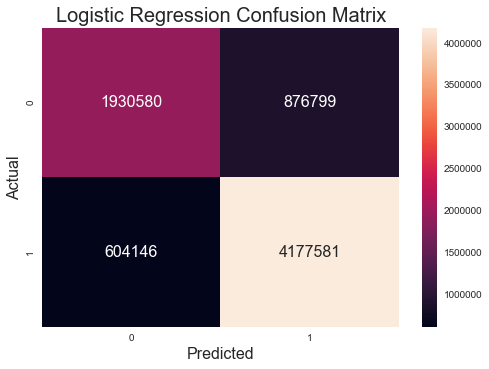

In [61]:
# making the confusion matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred_LR)
#print(cm)
print('Accuracy: %.6f' % accuracy_score(y_test, y_pred_LR))
output = precision_recall_fscore_support(y_test, y_pred_LR, average='weighted')
print('Precision: %.6f' % output[0])
print('Recall: %.6f' % output[1])
print('fscore: %.6f' % output[2])

sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Logistic Regression Confusion Matrix',fontsize=20)

In [62]:
from sklearn.metrics import classification_report

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_LR)
print(sk_report)

              precision    recall  f1-score   support

           0   0.761652  0.687681  0.722779   2807379
           1   0.826527  0.873655  0.849438   4781727

    accuracy                       0.804859   7589106
   macro avg   0.794090  0.780668  0.786108   7589106
weighted avg   0.802528  0.804859  0.802584   7589106



Cross validation

In [ ]:
%%time
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("SD: {:.2f} %".format(accuracies.std()*100))

# Naive Bayes

In [23]:
%%time
# 16 seconds
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred_NB = classifier.predict(X_test)
y_pred_NB_p = classifier.predict_proba(X_test)

CPU times: user 10.5 s, sys: 3.61 s, total: 14.1 s
Wall time: 15.2 s


Accuracy: 0.779739
Precision: 0.781059
Recall: 0.779739
fscore: 0.780321
CPU times: user 12.1 s, sys: 625 ms, total: 12.7 s
Wall time: 12.9 s


Text(0.5, 1, 'Naive Bayes Confusion Matrix')

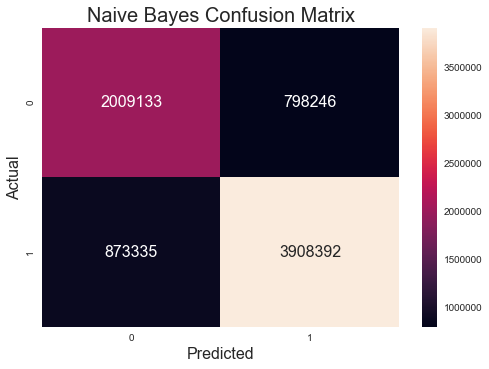

In [64]:
%%time
# making the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
cm = confusion_matrix(y_test, y_pred_NB)
#print(cm)
print('Accuracy: %.6f' % accuracy_score(y_test, y_pred_NB))
output = precision_recall_fscore_support(y_test, y_pred_NB, average='weighted')
print('Precision: %.6f' % output[0])
print('Recall: %.6f' % output[1])
print('fscore: %.6f' % output[2])

sn.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt="d")
plt.xlabel('Predicted', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Naive Bayes Confusion Matrix',fontsize=20)

In [30]:
from sklearn.metrics import classification_report

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred_NB)
print(sk_report)

              precision    recall  f1-score   support

           0   0.697018  0.715661  0.706217   2807379
           1   0.830400  0.817360  0.823828   4781727

    accuracy                       0.779739   7589106
   macro avg   0.763709  0.766511  0.765023   7589106
weighted avg   0.781059  0.779739  0.780321   7589106



In [31]:
%%time
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("SD: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.00 %
SD: 0.03 %
CPU times: user 1min 44s, sys: 1min 18s, total: 3min 3s
Wall time: 4min


## ROC curves

AUC on decision tree: 0.725
AUC on logistic: 0.781
AUC on Naive Bayes: 0.767


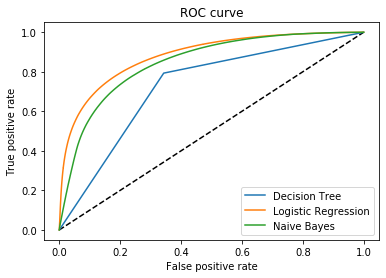

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Decision tree
fpr_dt_lm, tpr_dt_lm, _ = roc_curve(y_test, y_pred)
# logistic
fpr_lr_lm, tpr_lr_lm, _ = roc_curve(y_test, y_pred_LR_p[:,1])
# Naive Bayes
fpr_nb_lm, tpr_nb_lm, _ = roc_curve(y_test, y_pred_NB_p[:,1])

print('AUC on decision tree: %.3f' % roc_auc_score(y_test, y_pred))
print('AUC on logistic: %.3f' % roc_auc_score(y_test, y_pred_LR))
print('AUC on Naive Bayes: %.3f' % roc_auc_score(y_test, y_pred_NB))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt_lm, tpr_dt_lm, label='Decision Tree')
plt.plot(fpr_lr_lm, tpr_lr_lm, label='Logistic Regression')
plt.plot(fpr_nb_lm, tpr_nb_lm, label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Decision Tree: f1=0.795 auc=0.860
Logistic Regression: f1=0.849 auc=0.923
Naive Bayes: f1=0.824 auc=0.885


/Users/donkim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


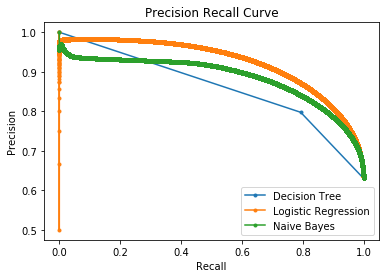

In [27]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_pred)
dt_f1, dt_auc = f1_score(y_test, y_pred), auc(dt_recall, dt_precision)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_LR_p[:,1])
lr_f1, lr_auc = f1_score(y_test, y_pred_LR), auc(lr_recall, lr_precision)

nb_precision, nb_recall, _ = precision_recall_curve(y_test, y_pred_NB_p[:,1])
nb_f1, nb_auc = f1_score(y_test, y_pred_NB), auc(nb_recall, nb_precision)

print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('Naive Bayes: f1=%.3f auc=%.3f' % (nb_f1, nb_auc))

plt.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
plt.plot(nb_recall, nb_precision, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend()
plt.show()

Text(0.5, 1.0, 'F1, AUC, Accuracy scores comparison')

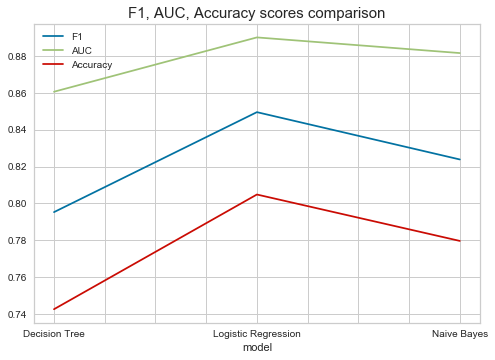

In [90]:
d = {'model':['Decision Tree','Logistic Regression','Naive Bayes'],
     'F1':[dt_f1, lr_f1, nb_f1],
     'AUC':[dt_auc, lr_auc,nb_auc],
    'Accuracy':[0.742775,0.804859,0.779739]}
scores = pd.DataFrame(data = d)
#                      columns = ['f1','auc'])
# scores.columns =['Decision Tree','Logistic Regression','Naive Bayes']

ax = plt.gca()
scores.plot(kind='line',x='model',y='F1',ax=ax)
scores.plot(kind='line',x='model',y='AUC',ax=ax)
scores.plot(kind='line',x='model',y='Accuracy',ax=ax)
plt.title('F1, AUC, Accuracy scores comparison', fontsize = 15)

Logistic gives the best result.